In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from mpdaf.sdetect import Source

plt.style.use('seaborn-notebook')

In [2]:
s = Source.from_file('/home/simon/data/UDF/udf10_c031_e021/udf_udf10_00015.fits')

/home/simon/dev/astropy/astropy/visualization/mpl_normalize.py:76: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/simon/miniconda3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


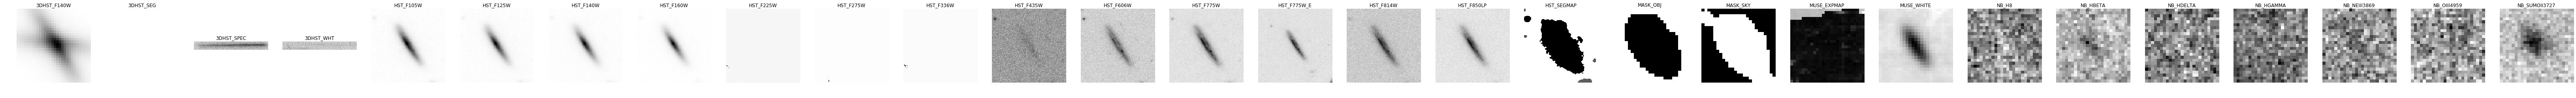

In [3]:
nimages = len(s.images)
fix, axes = plt.subplots(1, nimages, figsize=(4*nimages, 4))
for ax, name in zip(axes, sorted(s.images)):
    s.show_ima(ax, name)

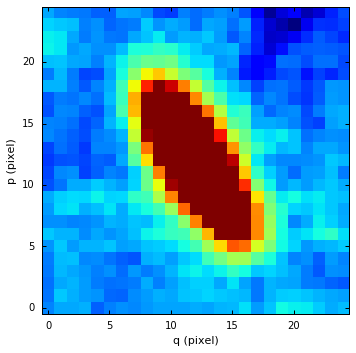

In [4]:
s.images['MUSE_WHITE'].plot(zscale=True)

In [5]:
cube = s.cubes['MUSE_CUBE']
sptot = cube.sum(axis=(1,2))

In [6]:
objmask = s.images['MASK_OBJ']._data.astype(bool)

In [7]:
cmask = cube.copy()
cmask[:, ~objmask] = np.ma.masked
spmask = cmask.sum(axis=(1,2))

In [11]:
cut = slice(*sptot.wave.pixel((6100, 6300), nearest=True))
cut

slice(1080, 1240, None)

In [9]:
s.spectra

{'3DHST_SENS': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a598d0>,
 'MUSE_PSF': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a3a8d0>,
 'MUSE_PSF_SKYSUB': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a59a20>,
 'MUSE_SKY': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a3ad30>,
 'MUSE_TOT': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a3aa58>,
 'MUSE_TOT_SKYSUB': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a3afd0>,
 'MUSE_WHITE': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a59588>,
 'MUSE_WHITE_SKYSUB': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a59208>,
 'PFIT_CONT': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a59438>,
 'PFIT_SPEC': <mpdaf.obj.spectrum.Spectrum at 0x7ff071a59940>}

/home/simon/dev/mpdaf/lib/mpdaf/obj/data.py:736: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  data = self._data[item]
/home/simon/dev/mpdaf/lib/mpdaf/obj/data.py:739: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mask = mask[item]
/home/simon/dev/mpdaf/lib/mpdaf/obj/data.py:741: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  var = self._var[item]


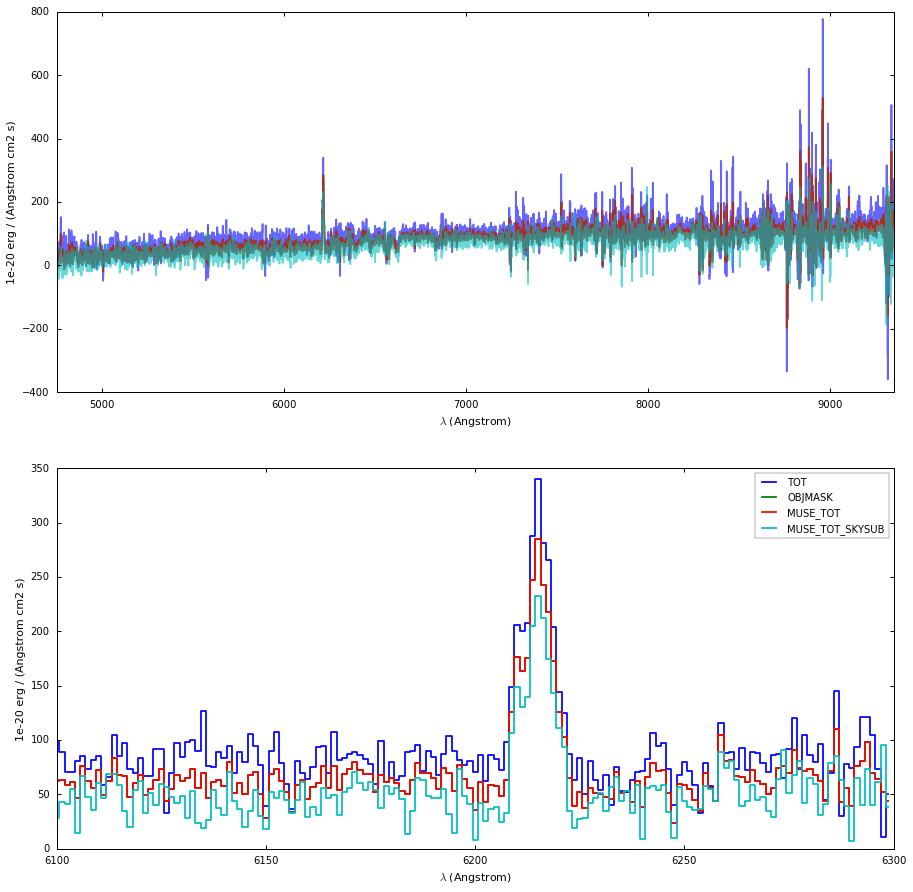

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))

sptot.plot(ax=ax1, label='TOT', alpha=0.6)
spmask.plot(ax=ax1, label='OBJMASK', alpha=0.6)
s.show_spec(ax1, 'MUSE_TOT', alpha=0.6)
s.show_spec(ax1, 'MUSE_TOT_SKYSUB', alpha=0.6)
ax1.set_xlim(*sptot.get_range())

sptot[cut].plot(ax=ax2, label='TOT')
spmask[cut].plot(ax=ax2, label='OBJMASK')
s.spectra['MUSE_TOT'][cut].plot(ax=ax2, label='MUSE_TOT')
s.spectra['MUSE_TOT_SKYSUB'][cut].plot(ax=ax2, label='MUSE_TOT_SKYSUB')

ax2.legend()